In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import random
from mpl_toolkits.mplot3d import Axes3D

In [64]:
# Make dataset
x_orig = []
y_orig = np.zeros((1,120))
for i in range(0, 36):
    for j in range(i*120 + 1, i*120 + 121) :
        img = Image.open('dataset/{0}/pattern_{1}.jpg'.format(i, j)) 
        data = np.array(img)
        x_orig.append(data)
        
for i in range(1,36):
    y_orig = np.append(y_orig, np.full((1, 120),i), axis = 1)      
x_orig = np.array(x_orig)
y_orig = y_orig.T

label = np.arange(0,36)

In [65]:
label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [66]:
print(x_orig.shape)
print(y_orig.shape)

(4320, 64, 64)
(4320, 1)


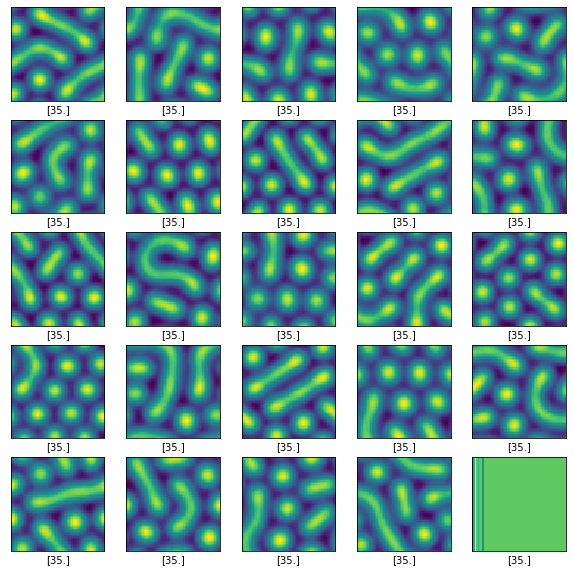

In [68]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[i+4200,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(y_orig[i+4200])
plt.show()

In [69]:
# Flatten the training and test images
x_flatten = x_orig.reshape(x_orig.shape[0], -1)

# Normalize image vectors
X = (2/255) * x_flatten - 1

# Explore dataset 
print ("number of examples = " + str(X.shape[0]))
print ("X shape: " + str(X.shape))
print ("Y shape: " + str(y_orig.shape))

number of examples = 4320
X shape: (4320, 4096)
Y shape: (4320, 1)


In [70]:
def gradient_vec(X):
    g_X_r = np.gradient(X, axis = 1)
    g_X_c = np.gradient(X, axis = 0)
    g_X = g_X_r**2 + g_X_c**2
    return g_X

In [71]:
X1 = np.var(X - X**3, axis=1)
X2 = np.mean(gradient_vec(X), axis = 1)
X3 = np.mean(X, axis = 1)

In [72]:
X11 = [] ; X22 = [] ; X33 = []
for i in range(36):
    X11.append(np.mean(X1[i*120:i*120+120]))
    X22.append(np.mean(X2[i*120:i*120+120]))
    X33.append(np.mean(X3[i*120:i*120+120]))

In [74]:
X1 = X1.reshape((4320,1))
X2 = X2.reshape((4320,1))
X3 = X3.reshape((4320,1))

X11 = np.reshape(X11,(36,1))
X22 = np.reshape(X22,(36,1))
X33 = np.reshape(X33,(36,1))

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X11.shape)
print(X22.shape)
print(X33.shape)

(4320, 1)
(4320, 1)
(4320, 1)
(36, 1)
(36, 1)
(36, 1)


In [75]:
data = np.concatenate((X11,X22,X33),axis=1)

In [76]:
data.shape

(36, 3)

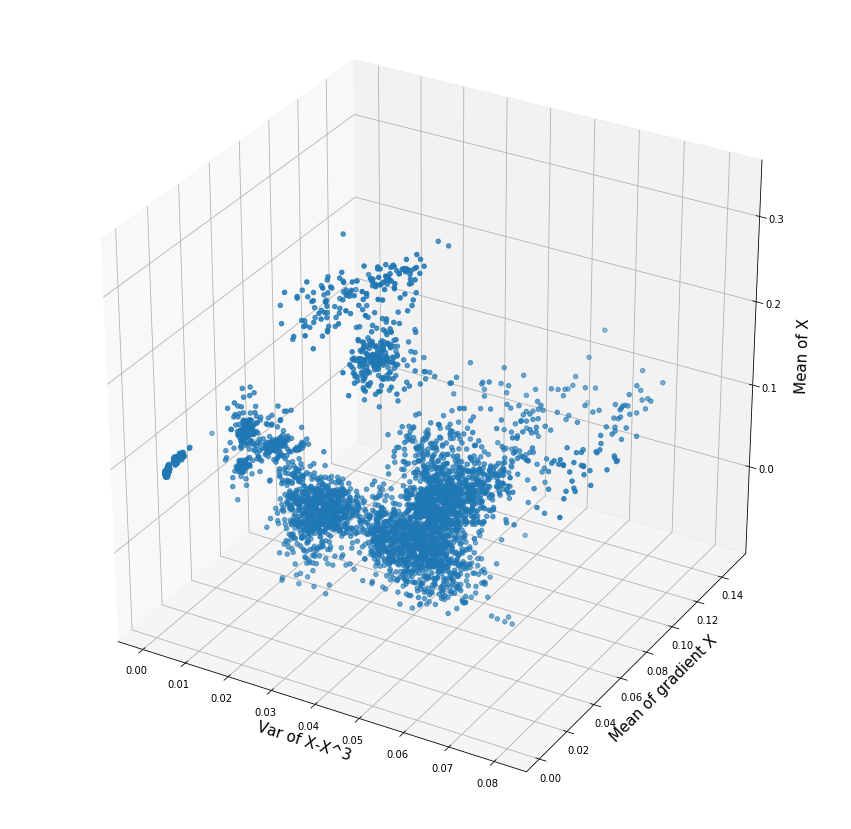

In [77]:
# visualization-40
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(X1, X2, X3)
ax.set_xlabel("Var of X-X^3", fontsize = 15)
ax.set_ylabel("Mean of gradient X", fontsize = 15)
ax.set_zlabel("Mean of X", fontsize = 15, labelpad = 13)
fig.savefig('graph3D/all.jpg', dpi=300)
plt.show()
ax.view_init(45, 45)

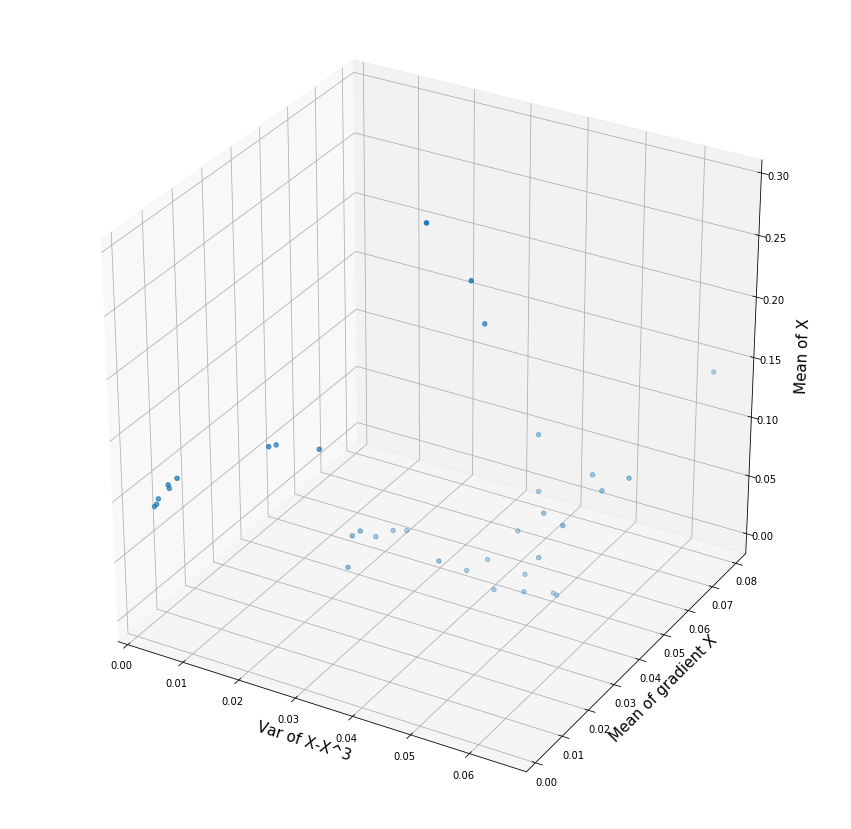

In [78]:
# visualization_mean
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel("Var of X-X^3", fontsize = 15)
ax.set_ylabel("Mean of gradient X", fontsize = 15)
ax.set_zlabel("Mean of X", fontsize = 15, labelpad = 13)
fig.savefig('graph3D/all_.jpg', dpi=300)
plt.show()
ax.view_init(45, 45)

In [139]:
model = KMeans(init="k-means++", n_clusters=7, random_state=500)
model.fit(data)
y_pred = model.labels_

In [140]:
print("1 cluster :",label[np.where(y_pred == 0)])
print("2 cluster :",label[np.where(y_pred == 1)])
print("3 cluster :",label[np.where(y_pred == 2)])
print("4 cluster :",label[np.where(y_pred == 3)])
print("5 cluster :",label[np.where(y_pred == 4)])
print("6 cluster :",label[np.where(y_pred == 5)])
print("7 cluster :",label[np.where(y_pred == 6)])

1 cluster : [ 7 14 20 21 28 29]
2 cluster : [23]
3 cluster : [ 2  3  4  5  9 10 11 16 17]
4 cluster : [19 25 26 27 32 33 34 35]
5 cluster : [ 8 15]
6 cluster : [ 1 22]
7 cluster : [ 0  6 12 13 18 24 30 31]


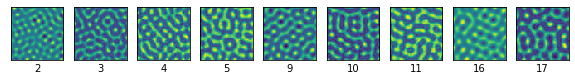

In [104]:
plt.figure(figsize=(10,10))
for i in range(len(label[np.where(y_pred == 0)])):
    plt.subplot(1, len(label[np.where(y_pred == 0)]), i+1)
    l = label[np.where(y_pred == 0)][i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[l*120,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(label[np.where(y_pred == 0)][i])
plt.show()

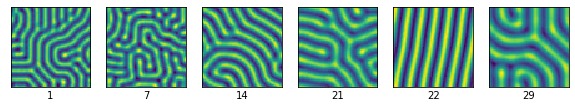

In [106]:
plt.figure(figsize=(10,10))
for i in range(len(label[np.where(y_pred == 1)])):
    plt.subplot(1, len(label[np.where(y_pred == 1)]), i+1)
    l = label[np.where(y_pred == 1)][i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[l*120,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(label[np.where(y_pred == 1)][i])
plt.show()

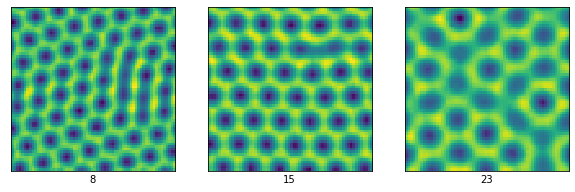

In [107]:
plt.figure(figsize=(10,10))
for i in range(len(label[np.where(y_pred == 2)])):
    plt.subplot(1, len(label[np.where(y_pred == 2)]), i+1)
    l = label[np.where(y_pred == 2)][i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[l*120,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(label[np.where(y_pred == 2)][i])
plt.show()

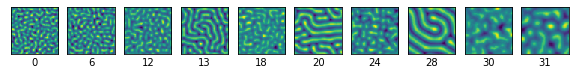

In [109]:
plt.figure(figsize=(10,10))
for i in range(len(label[np.where(y_pred == 3)])):
    plt.subplot(1, len(label[np.where(y_pred == 3)]), i+1)
    l = label[np.where(y_pred == 3)][i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[l*120,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(label[np.where(y_pred == 3)][i])
plt.show()

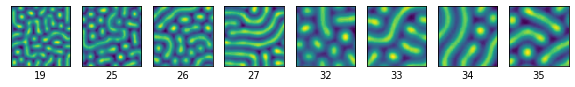

In [111]:
plt.figure(figsize=(10,10))
for i in range(len(label[np.where(y_pred == 4)])):
    plt.subplot(1, len(label[np.where(y_pred == 4)]), i+1)
    l = label[np.where(y_pred == 4)][i]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = np.reshape(x_orig[l*120,:] , [64,64])
    plt.imshow(image)
    plt.xlabel(label[np.where(y_pred == 4)][i])
plt.show()

In [ ]:
# visualization_mean
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel("Var of X-X^3", fontsize = 15)
ax.set_ylabel("Mean of gradient X", fontsize = 15)
ax.set_zlabel("Mean of X", fontsize = 15, labelpad = 13)
fig.savefig('graph3D/all_.jpg', dpi=300)
plt.show()
ax.view_init(45, 45)

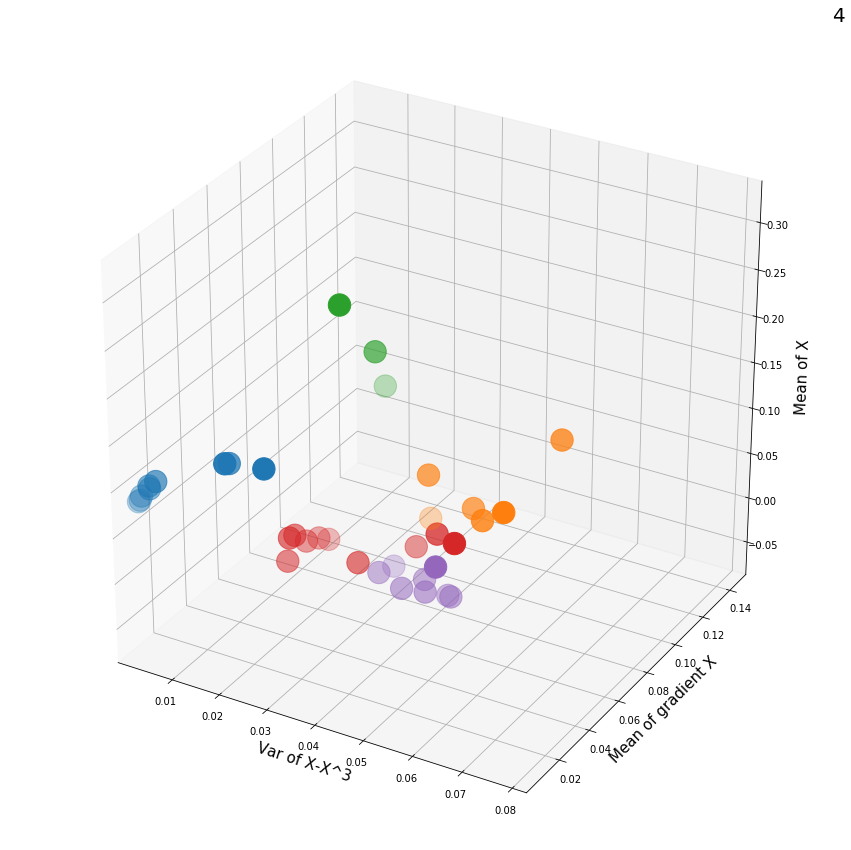

In [122]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(min(X1), max(X1))
ax.set_ylim3d(min(X2), max(X2))
ax.set_zlim3d(min(X3), max(X3))
for i in range(5):   
    plt.title(i, loc = 'right', fontsize = 20)
    ax.scatter(data[[np.where(y_pred == i)],0], data[[np.where(y_pred == i)],1], data[[np.where(y_pred == i)],2], s=500)
    ax.set_xlabel("Var of X-X^3", fontsize = 15)
    ax.set_ylabel("Mean of gradient X", fontsize = 15)
    ax.set_zlabel("Mean of X", fontsize = 15, labelpad = 13)
fig.savefig('graph3D/all_mean.jpg', dpi=300)    
plt.show()